In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os

import enzope

In [3]:
# Params
r_puntuales = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
r_cautos = r_puntuales[1:]
r_cautos_sobre2 = [r/2 for r in r_cautos]
fs = [0, .05, .1, .2, .3]
mcs = 200000

In [4]:
gini_final_cautos = []
gini_final_puntuales = []

for f in fs:
    gini_ensemble_puntuales = np.load(f'data/2_r_constant/gini_ensemble_f={f}_mcs=200000_r_constant.npy')
    aux = [np.mean(gini[-1000:], axis=1) for gini in gini_ensemble_puntuales]
    gini_final_puntuales.append(np.mean(aux, axis=0))
    
    gini_ensemble_cautos = np.load(f'data/1_r_max/gini_ensemble_f={f}_mcs=200000_various_r_max.npy')
    aux = [np.mean(gini[-1000:], axis=1) for gini in gini_ensemble_cautos]
    gini_final_cautos.append(np.mean(aux, axis=0))

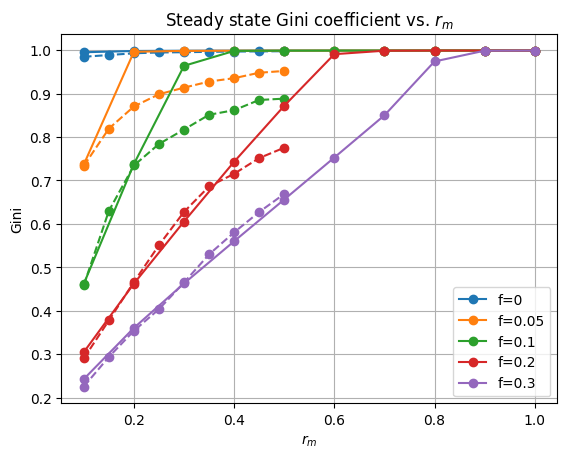

In [7]:
for f in fs:
    # Plot gini puntual in solid line and gini cauto in dashed line both of the same color
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(r_puntuales, gini_final_puntuales[fs.index(f)], label=f'f={f}', marker='o', linestyle='-', color=color)
    plt.plot(r_cautos_sobre2, gini_final_cautos[fs.index(f)], marker='o', linestyle='--', color=color)
plt.xlabel(r'$r_{m}$')
plt.ylabel('Gini')
plt.legend()
plt.title('Steady state Gini coefficient vs. $r_{m}$')
plt.grid()
plt.show()

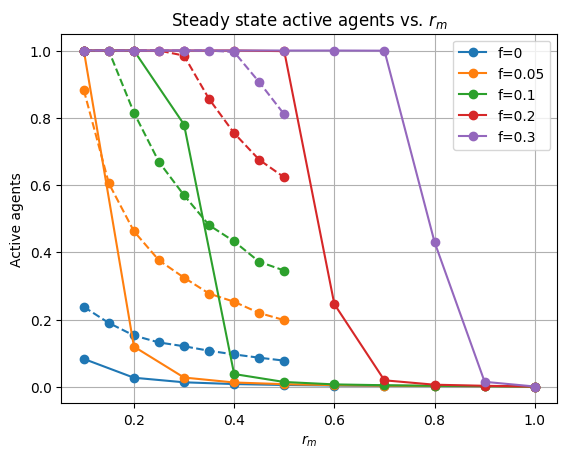

In [8]:
# Plot of the number of active agents vs. $r_{m}$ for different values of $f$
actives_final_cautos = []
actives_final_puntuales = []

for f in fs:
    actives_ensemble_puntuales = np.load(f'data/2_r_constant/actives_ensemble_f={f}_mcs=200000_r_constant.npy')
    aux = [np.mean(actives[-1000:], axis=1) for actives in actives_ensemble_puntuales]
    actives_final_puntuales.append(np.mean(aux, axis=0))

    actives_ensemble_cautos = np.load(f'data/1_r_max/actives_ensemble_f={f}_mcs=200000_various_r_max.npy')
    aux = [np.mean(actives[-1000:], axis=1) for actives in actives_ensemble_cautos]
    actives_final_cautos.append(np.mean(aux, axis=0))

for f in fs:
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(r_puntuales, actives_final_puntuales[fs.index(f)], label=f'f={f}', marker='o', linestyle='-', color=color)
    plt.plot(r_cautos_sobre2, actives_final_cautos[fs.index(f)], marker='o', linestyle='--', color=color)

plt.xlabel(r'$r_{m}$')
plt.ylabel('Active agents')
plt.legend()
plt.title('Steady state active agents vs. $r_{m}$')
plt.grid()
# plt.savefig('figs/actives_vs_r_max.png', dpi=300)
plt.show()

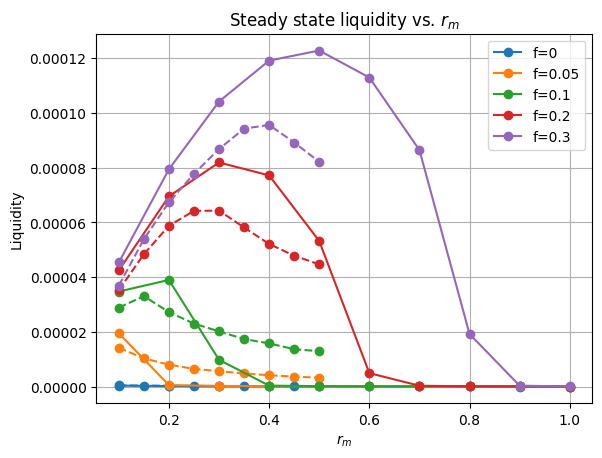

In [9]:
liquidity_final_cautos = []
liquidity_final_puntuales = []

for f in fs:
    liquidity_ensemble_puntuales = np.load(f'data/2_r_constant/liquidity_ensemble_f={f}_mcs=200000_r_constant.npy')
    aux = [np.mean(liquidity[-1000:], axis=1) for liquidity in liquidity_ensemble_puntuales]
    liquidity_final_puntuales.append(np.mean(aux, axis=0))

    liquidity_ensemble_cautos = np.load(f'data/1_r_max/liquidity_ensemble_f={f}_mcs=200000_various_r_max.npy')
    aux = [np.mean(liquidity[-1000:], axis=1) for liquidity in liquidity_ensemble_cautos]
    liquidity_final_cautos.append(np.mean(aux, axis=0))

for f in fs:
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(r_puntuales, liquidity_final_puntuales[fs.index(f)], label=f'f={f}', marker='o', linestyle='-', color=color)
    plt.plot(r_cautos_sobre2, liquidity_final_cautos[fs.index(f)], marker='o', linestyle='--', color=color)

plt.xlabel(r'$r_{m}$')
plt.ylabel('Liquidity')
plt.legend()
plt.title('Steady state liquidity vs. $r_{m}$')
plt.grid()
# plt.savefig('figs/liquidity_vs_r_max.png', dpi=300)
plt.show()